# IMPORT PYTHON LIBRARIES

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATASET

In [12]:
db = pd.read_csv('diabetes_prediction_dataset.csv')

In [13]:
db

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# EXPLORATORY DATA ANALYSIS

In [14]:
db.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [15]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [16]:
db.corr()['diabetes']

age                    0.258008
hypertension           0.197823
heart_disease          0.171727
bmi                    0.214357
HbA1c_level            0.400660
blood_glucose_level    0.419558
diabetes               1.000000
Name: diabetes, dtype: float64

In [17]:
db.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

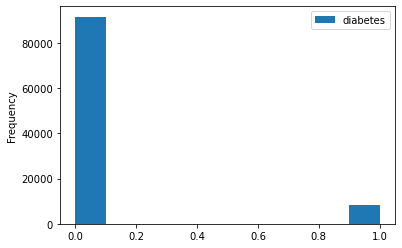

In [18]:
db.plot.hist(y='diabetes')

C:\Users\Chidinma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

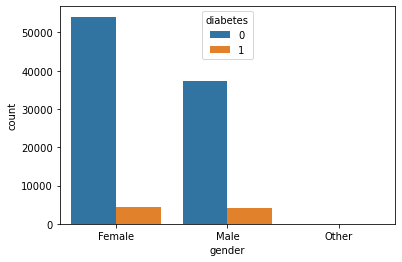

In [19]:
sns.countplot('gender', data = db, hue = 'diabetes')

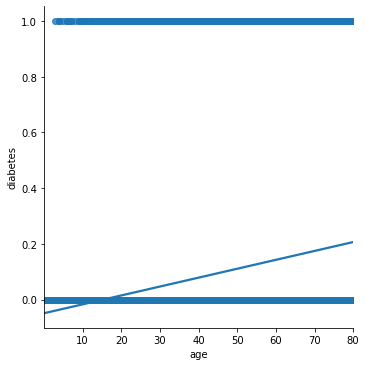

In [20]:
sns.lmplot (x = 'age', y = 'diabetes', data=db, fit_reg=True, ci= None)

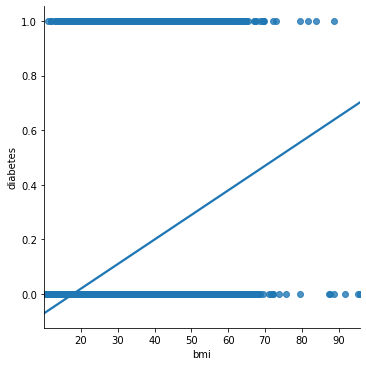

In [21]:
sns.lmplot (x = 'bmi', y = 'diabetes', data=db, fit_reg=True, ci= None)

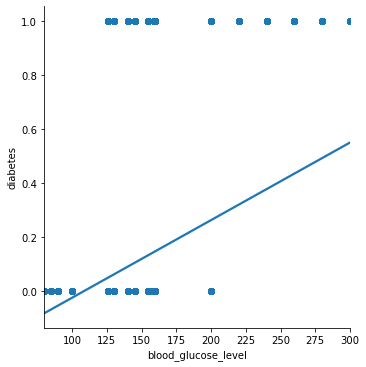

In [22]:
sns.lmplot (x = 'blood_glucose_level', y = 'diabetes', data=db, fit_reg=True, ci= None)

# DROP UNNECESSARY DATA

In [23]:
db['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [24]:
Other = db[ db['gender'] == 'Other' ].index
db.drop (Other, inplace = True)

In [25]:
db['gender'].value_counts()

Female    58552
Male      41430
Name: gender, dtype: int64

In [26]:
db['smoking_history'].value_counts()

No Info        35810
never          35092
former          9352
current         9286
not current     6439
ever            4003
Name: smoking_history, dtype: int64

In [27]:
not_current = db[ db['smoking_history'] == 'not current' ].index
db.drop (not_current, inplace = True)

ever = db[ db['smoking_history'] == 'ever' ].index
db.drop (ever, inplace = True)

In [28]:
db['smoking_history'].value_counts()

No Info    35810
never      35092
former      9352
current     9286
Name: smoking_history, dtype: int64

# TRANSFORM DATA

In [29]:
from sklearn.preprocessing import LabelEncoder 

In [30]:
lbl_encode = LabelEncoder()
lbl_encode.fit_transform (db['smoking_history'])
db['smoking_history'] = lbl_encode.fit_transform(db['smoking_history'])

In [31]:
db['smoking_history'].unique()

array([3, 0, 1, 2])

In [32]:
db['smoking_history'].value_counts()

0    35810
3    35092
2     9352
1     9286
Name: smoking_history, dtype: int64

In [33]:
lbl_encode = LabelEncoder()
lbl_encode.fit_transform (db['gender'])
db['gender'] = lbl_encode.fit_transform(db['gender'])

In [34]:
db['gender'].value_counts()

0    52401
1    37139
Name: gender, dtype: int64

In [55]:
db = db.drop('smoking', axis=1)

KeyError: "['smoking'] not found in axis"

In [56]:
db

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,2,27.83,5.7,155,0
99998,0,24.0,0,0,3,35.42,4.0,100,0


# SPLIT THE DATA

In [37]:
X = db.drop(['diabetes'], axis=1)

y = db['diabetes']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [39]:
X_train.shape, X_test.shape

((62678, 8), (26862, 8))

# FEATURE SCALING

In [40]:
X_train.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
count,62678.000000,62678.000000,62678.000000,62678.000000,62678.000000,62678.000000,62678.000000,62678.000000
mean,0.413813,41.100499,0.073391,0.037206,1.485944,27.170217,5.522217,138.039950
std,0.492520,22.704757,0.260779,0.189268,1.354332,6.650450,1.070008,40.713906
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000
25%,0.000000,23.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000
50%,0.000000,42.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000
75%,1.000000,59.000000,0.000000,0.000000,3.000000,29.400000,6.200000,159.000000
max,1.000000,80.000000,1.000000,1.000000,3.000000,95.220000,9.000000,300.000000


In [41]:
cols = X_train.columns

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [43]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [44]:
X_train.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
count,62678.000000,62678.000000,62678.000000,62678.000000,62678.000000,62678.000000,62678.000000,62678.000000
mean,0.413813,0.513270,0.073391,0.037206,0.495315,0.201387,0.367676,0.263818
std,0.492520,0.284094,0.260779,0.189268,0.451444,0.078048,0.194547,0.185063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.286787,0.000000,0.000000,0.000000,0.157141,0.236364,0.090909
50%,0.000000,0.524525,0.000000,0.000000,0.333333,0.203145,0.418182,0.272727
75%,1.000000,0.737237,0.000000,0.000000,1.000000,0.227555,0.490909,0.359091
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# MODEL TRAINING

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [46]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
logreg.predict_proba(X_test)[:,0]

array([0.97708327, 0.99853955, 0.99994428, ..., 0.99993024, 0.99999727,
       0.97267523])

In [48]:
logreg.predict_proba(X_test)[:,1]

array([2.29167279e-02, 1.46045280e-03, 5.57187037e-05, ...,
       6.97646318e-05, 2.73189091e-06, 2.73247744e-02])

# CHECK FOR ACCURACY

In [49]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.9601


In [50]:
y_pred_train = logreg.predict(X_train)

y_pred_train

print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9620


In [51]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.9620
Test set score: 0.9601


In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
print (cm)

[[24477   220]
 [  851  1314]]


In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     24697
           1       0.86      0.61      0.71      2165

    accuracy                           0.96     26862
   macro avg       0.91      0.80      0.84     26862
weighted avg       0.96      0.96      0.96     26862



<AxesSubplot:>

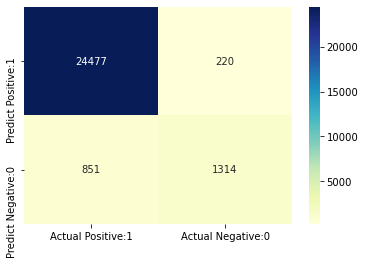

In [54]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')